# Mid-term exam
## Daniel Roa - A01021960
## Delivery date: **July 13, 2021**

# Questions
---

1. What is the difference between artificial intelligence, machine learning and deep learning? (6 points)

  Artificial intelligence is meant to mimic a human behaviours by interpreting different data. 
  Machine Learning is a way in which a computer "learns" by analysing data from different inputs in order to predict certain outcomes, the bigger the amount of input data, the model will be better in calculating the output.
  Deep Learning is a subset of Machine Learning that "learns" similarly as Machine Learning, but the main difference between *ML* and *DL* is that *DL* has layers or "Neurons" that improve the predictions that are being made. 

2. What is supervised learning? (6 points)

  Supervised learning is another kind of Machine Learning, in this variation, the algorithm is being fed a labeled dataset, in which the computer will be able to analyse and categorize specific information.

3. What does the loss function represent? (6 points)

  The Loss Function has a very important function in the implementation of a Neural Network. It's meant to update the value of the weights depending on the values that were calculated. This improves the training of the model.

4. Describe, in your own words, what are the weights of a neural network, and what kind of data do they store. (6 points)

  The weights in neural networks are the equivalent to the "strength" that links the neurons between them. They store values that are lower than 1, but, it's important to mention that the bigger the value, the bigger the strength between neurons is, not only this, but the bigger the value, the more exact the prediction will be.

5. What does the 'deep' in deep learning mean? (6 points)

  Since it's using multiple layers to make it's predictions, the *deep* part from it's name comes from the overall amount of layers that take part in it's network.

# Simple Neural Network

Complete the notebook so that you can run the following model on the XOR data set.

![Neural network](https://drive.google.com/uc?id=1jXT22Gd4hMQDJTrNLDRYSMCdCxH1dQ2t)

## Import the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define auxiliary functions

### Define the sigmoid and sigmoid derivative functions (10 points)

In [2]:
# TODO: Define the sigmoid function, as well as the derivative of the function

def sigmoid(x):
  ''' Calculates the sigmoid function on a set of data

    Args:
      x (np array): the array on which you apply the sigmoid function
    
    Returns:
      np array: an array with the result of the function on the input
    
  '''
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  ''' Calculates the derivative of the sigmoid function

    Args:
      x (np array): the array on which you apply the derivative sigmoid function
    
    Returns:
      np array: an array with the result of the function on the input
  '''
  return sigmoid(x)*(1 - sigmoid(x))

### Define the loss function (5 points)

In [3]:
# TODO: Define the loss function

def loss(y_hat, y):
  ''' Calculates the error of a prediction based on an input

  Args:
    y_hat (np array): the predictions of the model
    y (np array): the labels of the data inputs

  Returns:
    np array: an array with the errors for each prediction
  '''
  return (-(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat)))

### Define the predict function (15 points)

In [4]:
# TODO: Define the predict function

def predict(weights, b, input):
  ''' Makes a prediction on an input

  Args:
    weights (np array): The array of weights of a given layer of the model
    b (np array):  The array of biases for a given layer of the model
    input (np array): The input on which to predict

  Returns:
    tuple of np arrays: Tuple containing the value of z = W Input + b, and a = sigmoid(z)
  '''
  z = np.dot(weights, input) + b
  a = sigmoid(z)
  return (z, a)

## Training with the XOR dataset

### Input data set

In [5]:
XOR = np.array([[0,0], [0,1], [1,0], [1,1]]).T
print(f"XOR data: \n{XOR}\nShape: {XOR.shape}")

XOR_labels = np.array([[0, 1, 1, 0]])
print(f"XOR labels: \n{XOR_labels}\nShape: {XOR_labels.shape})")

number_inputs = 4

XOR data: 
[[0 0 1 1]
 [0 1 0 1]]
Shape: (2, 4)
XOR labels: 
[[0 1 1 0]]
Shape: (1, 4))


### Run the training step (30 points)

In [6]:
np.random.seed(42)

# TODO: initialize the needed matrices of weights with random values. Check np.random.randn
weights_1 = np.random.rand(2, 3).T
weights_2 = np.random.rand(3, 1).T

# TODO: initialize the needed biases with random values. Check np.random.randn
b_1 = np.random.rand(3, 1)
b_2 = np.random.rand(1, 1)

# TODO: initialize the learning rate
alpha = 0.5

# print(f'W1 {weights_1} W1.shape {weights_1.shape} b1 {b_1} b1.shape {b_1.shape}')
# print(f'W2 {weights_2} W2.shape {weights_2.shape} b2 {b_2} b2.shape {b_2.shape}')

errors = []

for epoch in range(3000):

  # Forward propagation - prediction

  # TODO: Make a prediction using the previous method
  input = XOR
  
  # Y hat - hidden layer
  y_hatH = sigmoid(np.dot(weights_1, input) + b_1)

  # Y hat - output layer
  y_hatO = sigmoid(np.dot(weights_2, y_hatH) + b_2)
  # print(y_hatO)

  # TODO: Calculate the error at the output layer
  J = np.sum(loss(y_hatO, XOR_labels)) / number_inputs
  # print(np.sum(loss(y_hatO, XOR_labels)))
  errors.append(J)

  # TODO: Calculate the derivatives for the output layer
  dyO = y_hatO - XOR_labels
  dw2 = (1/number_inputs) * np.dot(dyO, y_hatH.T)
  db2 = (1/number_inputs) * np.sum(dyO)

  # TODO: Calculate the derivative at the hidden layer
  dyH = (np.dot(weights_2.T, dyO) * sigmoid_derivative(np.dot(weights_1, input) + b_1)) # Partial derivative of Y in the hidden layer
  dw1 = (1/number_inputs) * np.dot(dyH, input.T)
  db1 = (1/number_inputs) * np.sum(dyH)

  # TODO: Update the weights
  weights_2 -= dw2 * alpha
  weights_1 -= dw1 * alpha

  # TODO: Update the biases
  b_2 -= db2 * alpha 
  b_1 -= db1 * alpha

  # Print the error after a number of epochs
  if epoch % 100 == 0:
    print(f"Error at epoch {epoch}: {J}")

Error at epoch 0: 1.0899615320738918
Error at epoch 100: 0.6932986195771662
Error at epoch 200: 0.6921315878471732
Error at epoch 300: 0.6890801801585343
Error at epoch 400: 0.678007686749815
Error at epoch 500: 0.6455647364173637
Error at epoch 600: 0.5804430361007101
Error at epoch 700: 0.49043517197129305
Error at epoch 800: 0.3791241675684369
Error at epoch 900: 0.27364070830349563
Error at epoch 1000: 0.1921102513411912
Error at epoch 1100: 0.12366829072277649
Error at epoch 1200: 0.07993252976603593
Error at epoch 1300: 0.057231399506021935
Error at epoch 1400: 0.04425815078253119
Error at epoch 1500: 0.03594732018895758
Error at epoch 1600: 0.03018166475140252
Error at epoch 1700: 0.02595428511472332
Error at epoch 1800: 0.0227272530227838
Error at epoch 1900: 0.020186894639509362
Error at epoch 2000: 0.01813785831235607
Error at epoch 2100: 0.016452130021793084
Error at epoch 2200: 0.015042352685114717
Error at epoch 2300: 0.013846907150109961
Error at epoch 2400: 0.01282111209

## Plotting the errors you stored

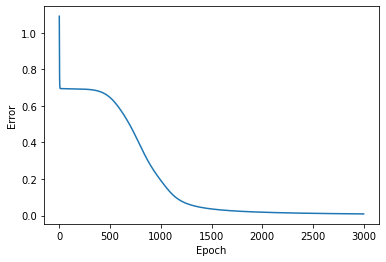

In [7]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

ax.plot(errors)

## Make a prediction on the data points to test the model (15 points)

In [8]:
# TODO: Predict on the sample input
print("\nOutput of the input After Training:\n")
np.set_printoptions(suppress=True)

input = XOR

z, y_hat = predict(weights_1, b_1, input)

print(XOR, XOR_labels, '\n\n', y_hat)



Output of the input After Training:

[[0 0 1 1]
 [0 1 0 1]] [[0 1 1 0]] 

 [[0.00553382 0.13993883 0.1319754  0.81636701]
 [0.00279029 0.958027   0.95898288 0.99999476]
 [0.00717829 0.13923849 0.150326   0.79831796]]
